# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday February 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 62 fair dice with faces `{1,2,3,4,5,6}`. Call these dice "Standard." In the same box, there are also 2 additional fair dice with faces `{1,1,2,2,3,3}`. Call these dice "Weird."  You grab one die at random from the box.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You roll your die one time.  What is the probability that you roll a 1? 

$$
Pr(1)= Pr(1|S) + Pr(1|W) = \frac{62}{64} \cdot \frac{1}{6} + \frac{2}{64} \cdot \frac{2}{6} = \frac{62}{384} + \frac{4}{384} = \frac{66}{384} = .171875 = 17.19\%
$$

**Part B**: Suppose you roll a 1.  What is the probability that the die you chose from the box is Weird? 

$$
Pr(W|1) =\frac{Pr(1|W)Pr(W)}{Pr(1)}=\frac{\frac{2}{64} \cdot \frac{2}{6}}{\frac{11}{64}} = \frac{64}{1056} = .06 \approx 6\%
$$

**Part C**: Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 4, 5, or 6 you know you picked a Standard die. But, if you roll $n$ times in a row and get only 1, 2, or 3,  you would have a stronger belief that you in fact grabbed one of the Weird dice. What is the smallest value of $n$ successive rolls of 1, 2, or 3 that would make you believe that there's a better-than-90% chance that the die you grabbed is Weird?  

$$
P(W|(1,2,3)^n)=\frac{P((1,2,3)^n|W)P(W)}{P((1,2,3)^n)}=\frac{P((1,2,3)^n|W)P(W)}{P((1,2,3)^n|W)P(W)+P((1,2,3)^n|S)P(S)}=\frac{1^n * \frac{2}{64}}{1^n*\frac{2}{64} + \frac{1}{2^n}*\frac{62}{64}}=\frac{\frac{2}{64}}{\frac{2}{64} + \frac{1}{2^n}*\frac{62}{64}}=\frac{\frac{2}{64}}{\frac{2}{64}(1+\frac{1}{2^n})}=\frac{1}{1+\frac{1}{2^n}}
$$
$$
\frac{1}{1+\frac{1}{2^n}}=\frac{9}{10}
$$
$$
\frac{10}{9}=1+\frac{1}{2^n}
$$
$$
\frac{1}{9}=\frac{1}{2^n}
$$
$$
2^n=9
$$
$$
n=\frac{2log(3)}{log(2)}=3.17 \approx 4 times
$$

### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

$$
\Omega=\{\{G_A,M_B\} , \{M_A,G_B\}, \{M_A,M_B,G_A,M_B\}, \{M_A,M_B,M_A,G_B\}, ... ,\}
$$

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

$$
P(W|E)=\frac{P(W\cap E)}{P(E)}= \frac{p(1-q)}{p(1-q) + q(1-p)}
$$

**Part C**: Explain why events $W$ and $T$ are independent. 

W and T are independent because W is not affected by the fact there was a tie on the first round of sudden death penalty shots. The factor of Team is winning will neither increase or decrease because they tied after the first round of suddent death penalty shots.

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

$$
P(E)P(W|E) + P(T)P(W|T) \\
[p(1-q) + q(1-p)]\frac{p(1-q)}{p(1-q)+q(1-p)} + [(1-p)(1-q)+pq]P(W|T)  \\
p(1-q) + [1-q-p-pq+pq]P(W|T) \\
p(1-q) + [2pq -q -p +1]P(W|T) \\
$$

This is the probablity that the game ends afte the first round * the probablity that team A wins given that the game ends in the after the first round + the probability that there is a tie * the probability that team A wins given that there is a tie.


**Part E**: Use the fact from **Part C** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

$$
P(W)=P(E)P(W|E) + P(T)P(W|T) \\
P(W)=P(E)P(W|E) + P(T)P(W) \\
P(W)=p(1-q) + (2pq -p -q)P(W) + P(W) \\
0=p(1-q) + (2pq -p -q)P(W) \\
P(W)(-2pq +p +q)=p(1-q) \\
P(W)=\frac{p(1-q)}{-2pq +p +q} \\
P(W)=\frac{p(1-q)}{p(1-q)+q(1-p)} \\
$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The answers to parts B and E are the same because W and T are independent of each other. The fact that there is a tie doesn't affect team A's chances are winning. 

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

The significance of the techinques used in Part D and E is that sometimes we can't compute certain variables such as P(W). So if we break it up into parts that we can solve, we can then solve for the desired variable. We can always techniques such as this.

### [25 points] Problem 3 
***

Jerry and Steve are just your typical North American river otters. They like typical otter things: sushi, the Boulder Reservoir, Kyle's office, Sofie's office, and the Ecology Department.  

After CSCI 3022 lets out for the day, there are a bunch of different locations that Jerry and Steve individually end up at.  Sometimes they go get sushi on the hill ($~H~$) or go for a swim at the Res ($~R~$). Sometimes they go straight to office hours with Kyle ($~K~$) or with Sofie ($~S~$), or they read otter-related literature in the Ecology dept ($~E~$). You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on map below.

Now, on a Wednesday after a really bumpy few days, Jerry and Steve leave class at Muenzinger, very very grumpy. They just wander randomly between their usual spots. Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along with equal probability. This even includes backtracking as an option! They sure are grumpy. 

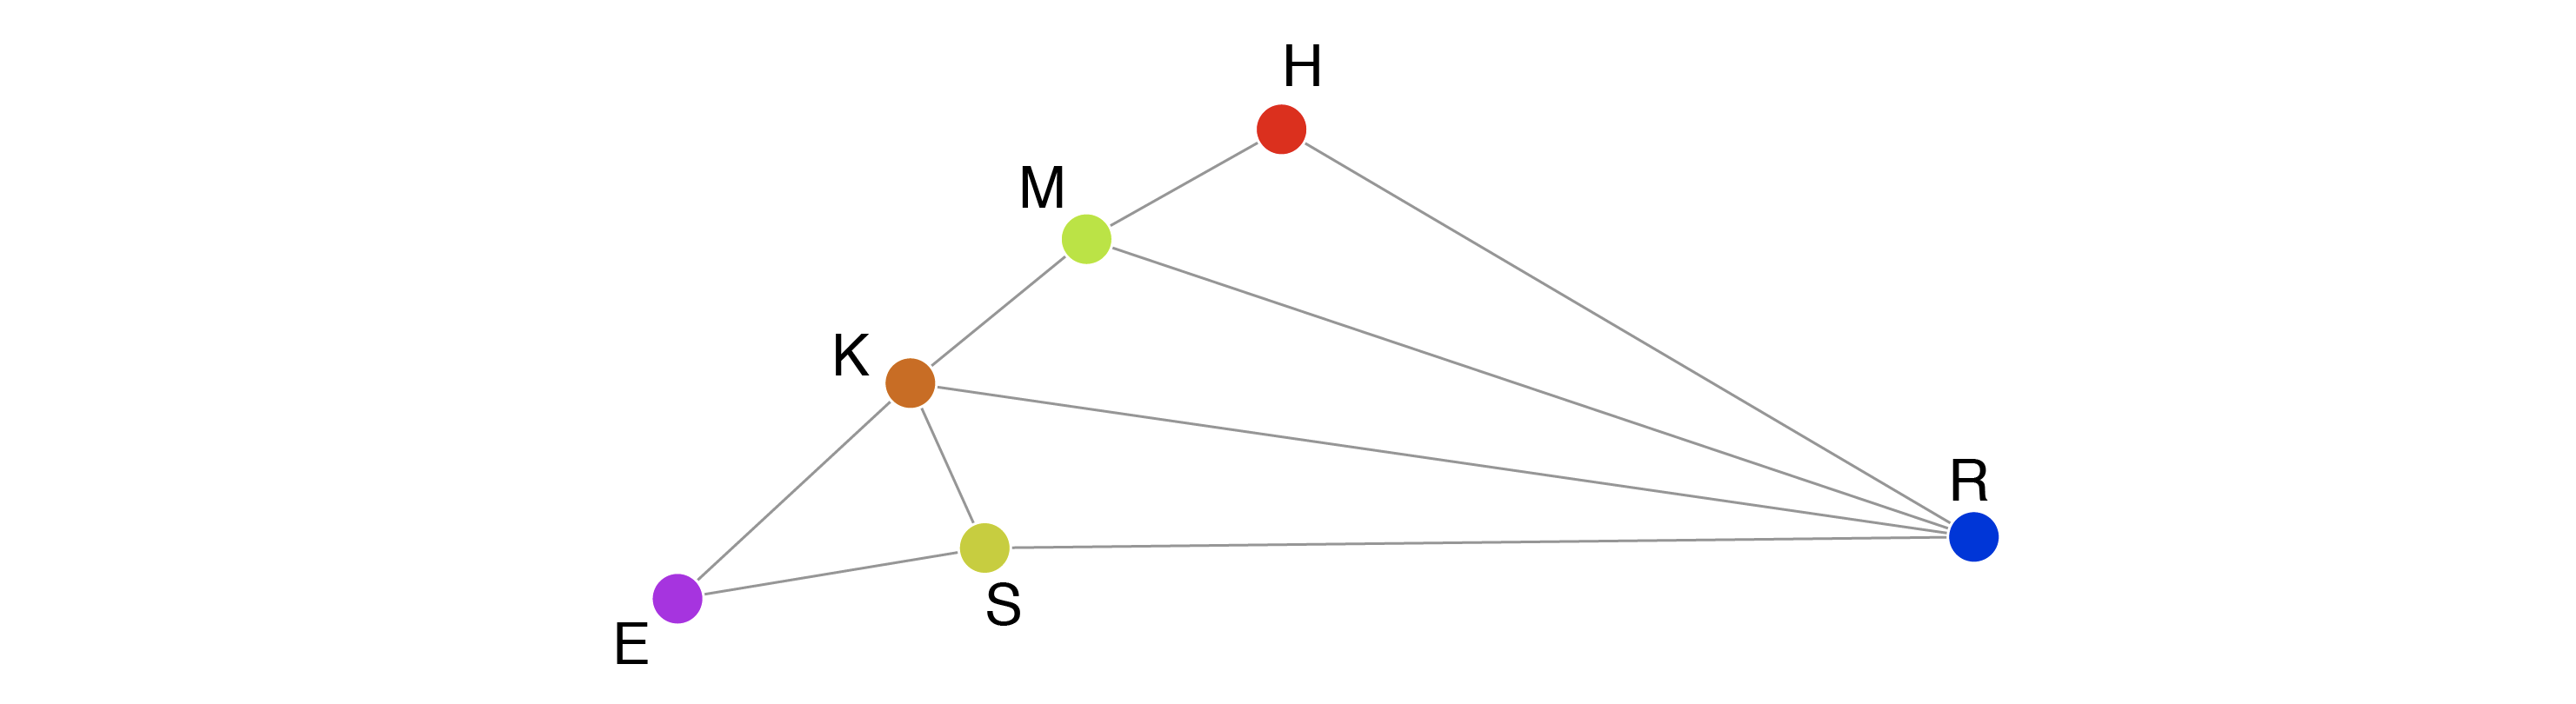

**Part A**: Compute (by hand) the probability that Steve ends up at the the Boulder Reservoir after first visiting one other location after leaving Muenzinger. 

Steve's Routes:MHM, MKM, MRM, MHR, MRH, MRK, MKR, MKE, MKS, MRS

There are two routes to get to the Boulder Reservoir after first visiting one other location. These routes are MHR and MKR.

Probability of MHR:
$$
\frac{1}{3}*\frac{1}{2}=\frac{1}{6}
$$

Probability of MKR:
$$
\frac{1}{3}*\frac{1}{4}=\frac{1}{12}
$$

The probability of taking either routes:
$$
\frac{1}{6}+\frac{1}{12}=\frac{1}{4}
$$

**Part B**: Compute (by hand) the probability that Jerry ends up at Kyle's office _either_ as his first _or_ second location visited after leaving the Reservoir. (Again, assume that Jerry wanders randomly using the same rules described above.)

Jerry's Routes:RHR, RMR, RKR, RSR, RHM, RMH, RMK, RKS, RKE, RSE, RSK, RKM 

Probability of R->K:
$$
\frac{1}{4}
$$

Probability of RMK:
$$
\frac{1}{4}*\frac{1}{3}=\frac{1}{12}
$$

Probability of RSK:
$$
\frac{1}{4}*\frac{1}{3}=\frac{1}{12}
$$

Probability of ending up at Kyle's office either at first or second location:
$$
\frac{1}{4}+\frac{1}{12}+\frac{1}{12}=\frac{5}{12} \approx 42\%
$$

**Part C**: Suppose that Jerry goes to the Boulder Reservoir and Steve goes to the Ecology Dept.  Later that afternoon, they both leave and wander around, randomly, as described above. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on the first location visited? What is the probability that they run into each other in the same location on the second location visited? What is the probability that they run into each other in either the first or second location visited?

Jerry's Routes:RHR, RMR, RKR, RSR, RHM, RMH, RMK, RKS, RKE, RSE, RSK, RKM 

Steve's Routes:EKE, ESE, EKM, EKS, EKR, ESR, ESK

The probability that they run into each other in the same location on the first location visited is:

Run into each other at S and K

E->K:
$$
\frac{1}{2}
$$
R->K:
$$
\frac{1}{4}
$$

E->S:
$$
\frac{1}{2}
$$
R->S:
$$
\frac{1}{4}
$$
Total Prob:
$$
\frac{1}{2}*\frac{1}{4}+\frac{1}{2}*\frac{1}{4}=\frac{1}{4}
$$

The probability that they run into each other in the same location on the second location visited is:

Ending at E:

From R:$(\frac{1}{4}*\frac{1}{4})+(\frac{1}{4}*\frac{1}{3})=\frac{7}{48}$

From E:$(\frac{1}{2}*\frac{1}{4})+(\frac{1}{2}*\frac{1}{3})=\frac{7}{24}$

From R * From E= $\frac{49}{1152}$

Ending at R:

From R:$\frac{1}{8}+\frac{1}{12}+\frac{1}{16}+\frac{1}{12}=\frac{17}{48}$

From E:$\frac{1}{8}+\frac{1}{6}=\frac{7}{24}$

From R* From E=$\frac{119}{1152}$

Ending at S:

From R:$\frac{1}{4}*\frac{1}{4}=\frac{1}{16}$

From E:$\frac{1}{2}*\frac{1}{4}=\frac{1}{8}$

From R * From E:$\frac{1}{16}*\frac{1}{8}=\frac{1}{128}$

Ending at M:

From R:$(\frac{1}{4}*\frac{1}{4})+(\frac{1}{4}*\frac{1}{2})=\frac{3}{16}$

From E:$\frac{1}{4}*\frac{1}{2}=\frac{1}{8}$

From R * From E=$\frac{3}{16}*\frac{1}{8}=\frac{3}{128}$

Ending at K:

From R:$(\frac{1}{4}*\frac{1}{3})+(\frac{1}{4}*\frac{1}{3})=\frac{1}{6}$

From E:$\frac{1}{2}*{1}{3}=\frac{1}{6}$

from R * From E=$\frac{1}{36}$

Total Prob:
$$
\frac{49}{1152}+\frac{119}{1152}+\frac{1}{128}+\frac{3}{128}+\frac{1}{36}=\frac{59}{288}
$$

$P(First\cap Second)$:

$ESK*RSK + EKS*RKS + EKM*RKM + ESR*RSR + EKR*RKR + ESE*RSE + EKE*RKE$

$\frac{1}{72} + \frac{1}{128} + \frac{1}{128} + \frac{1}{72} + \frac{1}{128} + \frac{1}{72} + \frac{1}{128}=\frac{7}{96}$

$P(First\cup Second)= P(First) + P(Second) - P(First\cap Second)$:

$\frac{1}{4}+\frac{59}{288}-\frac{7}{96}=\frac{55}{144}$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [85]:
H= {"Location" : np.array(["R","M"]), "Probability" : np.array([1/2,1/2])}
R= {"Location" : np.array(["H","M","K","S"]), "Probability" : np.array([1/4,1/4,1/4,1/4])}
M= {"Location" : np.array(["H","R","K"]), "Probability" : np.array([1/3,1/3,1/3])}
K= {"Location" : np.array(["M","R","S","E"]), "Probability" : np.array([1/4,1/4,1/4,1/4])}
E= {"Location" : np.array(["K","S"]), "Probability" : np.array([1/2,1/2])}
S= {"Location" : np.array(["E","K","R"]), "Probability" : np.array([1/3,1/3,1/3])}

def sim3A():
    first=np.random.choice(M["Location"], p=M["Probability"])
    if first == "H":
        second = np.random.choice(H["Location"], p=H["Probability"])
        if second == "R":
            return True
        else:
            return False
    if first == "K":
        second = np.random.choice(K["Location"], p=K["Probability"])
        if second == "R":
            return True
        else:
            return False
    else:
        return False
    
def sim3B():
    first = np.random.choice(R["Location"], p = R["Probability"])
    if first== "M":
        second = np.random.choice(M["Location"], p = M["Probability"])
        if second== "K":
            return True
        else:
            return False
    if first=="S":
        second = np.random.choice(S["Location"], p = S["Probability"])
        if second=="K":
            return True
        else:
            return False
    if first=="K":
        return True
    else:
        return False
    
def sim3C():
    jerryfirst = np.random.choice(R["Location"], p = R["Probability"])
    if jerryfirst == "H":
        jerrysecond = np.random.choice(H["Location"], p = H["Probability"])
    if jerryfirst == "M":
        jerrysecond = np.random.choice(M["Location"], p = M["Probability"])
    if jerryfirst == "K":
        jerrysecond = np.random.choice(K["Location"], p = K["Probability"])
    if jerryfirst == "S":
        jerrysecond = np.random.choice(S["Location"], p = S["Probability"])
        
    stevefirst = np.random.choice(E["Location"], p = E["Probability"])
    if stevefirst == "K":
        stevesecond = np.random.choice(K["Location"], p = K["Probability"])
    if stevefirst == "S":
        stevesecond = np.random.choice(S["Location"], p = S["Probability"])

    if jerryfirst == stevefirst:
        return True
    else:
        return False
        
    if jerrysecond == stevesecond:
        return True
    else:
        return False
    
simulations = 10000
countA = 0
countB = 0
countC = 0

for i in range(simulations):
    if sim3A() == True:
        countA = countA + 1
    if sim3B() == True:
        countB = countB + 1
    if sim3C() == True:
        countC = countC + 1

print("Probability part A:", (countA/simulations) * 100)
print("Probability part B:", (countB/simulations) * 100)
print("Probability part C:", (countC/simulations) * 100)

Probability part A: 24.490000000000002
Probability part B: 41.67
Probability part C: 24.67


sim3A:
In this function, I randomly had the function go anywhere(within its range) from the starting location of M. Then if that first location traveled was H or K, then I had another random generator that would select the second location visited. If the second visit was R it returned true. The first location had to either be H or K for the second location to end up at R. My calculated probability was 25% and the probability from the function was 24.49, so this means that it was accurate.

sim3B:
In this function, I randomly had the function go anywhere(within its range) from the starting location of R. If the first location visited was K, then it returned true. If the first location was M or S, then I had another random generator that selected the second location visited. If the second visit was K it returned true as well. The first location had to be either M or S for the second location to end up at K. My calculated probability was about 42% and the probability from the function was 41.67%, meaning that my calculations were accurate.

sim3C:
In the third function, I had two random generators for Jerry and Steve at their respective locations. From there, I checked had a conditonal statement checking all the locations of the first visited location that could potentially let Jerry and Steve meet. Then at every first location that they visited or allowed them to eventually visit each other for the second location, I had another generator that randomly selected the next path from each respective first location. Finally, I had a comparison that checked if Jerry and Steve met on the first location and a comparison to check if they visited on the second location. If they did meet each other, the function would return true. My calculated probaility was about 38% and the one generated from the function was 24.67%. These values are fairly skewed, so an error may have occured. 

### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$100, \$125, or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

- If the player rolls doubles, she gains $10\times$ the doubled number, in addition to whatever other actions her roll may have caused. For example, rolling two sixes results in a payment of \$60. This rule does not apply if the player begins the turn from Jail.

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [95]:
def miniopoly_turn(state, cash):
    roll1 = {"Roll" : np.array([1, 2, 3, 4, 5, 6]), "Probability" : np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])}
    roll2 = {"Roll" : np.array([1, 2, 3, 4, 5, 6]), "Probability" : np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])}
    
    #start at 0 cash
    if cash<=0:
        cash=0
        return state,cash
    
    d1 = np.random.choice(roll1['Roll'], p = roll1['Probability'])
    d2 = np.random.choice(roll2['Roll'], p = roll2['Probability'])
    
    moves=d1+d2
        
    #start at go to jail
    if state==30:
        if d1!=d2:
            cash=cash-10
            if cash<=0:
                cash=0
            return state,cash
        elif d1==d2:
            state=10+moves
    else:
        
    #changes position after dice rolls   
        if d1==d2:
            cash=cash+(d1*10)
        
        state=(state+moves)
    
        if(state)>=40:
            cash=cash+200
            state=state-40
            
    
    #check new position
    if state == 0 or state== 10 or state==20:
        return state,cash

    elif state==2 or state ==7 or state==17 or state==22 or state==33 or state==36:
        draw=np.random.choice([50,100,-100,-125,-150])
        
        cash=cash+draw           
        if cash<=0:
            cash=0
        return state,cash
        
    elif state==30:
        return state,cash
    
    else:
        cash=cash-state
        if cash<=0:
            cash=0
        return state,cash
        
    return state, cash            

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

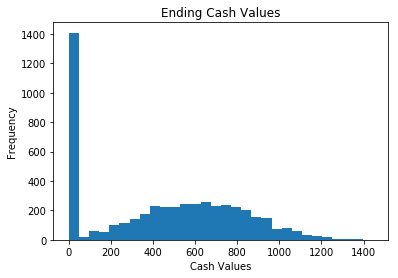

In [96]:
def testA():

    runs = 5000
    results = []
    for i in range(runs):
        state = 0
        cash = 200
        for i in range(30):
            state, cash = miniopoly_turn(state, cash)
            if cash <= 0:
                break
        results.append(cash)
    plt.hist(results, bins = 30)
    plt.title("Ending Cash Values")
    plt.xlabel("Cash Values")
    plt.ylabel("Frequency")
    plt.show
testA()


**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [98]:
def testB():

    runs = 5000
    results = []
    bankruptcount=0
    for i in range(runs):
        state = 0
        cash = 200
        for i in range(30):
            state, cash = miniopoly_turn(state, cash)
            if cash <= 0:
                bankruptcount+=1
                break
        results.append(cash)
    print("The probability that a player goes bankrupt in the first 30 turns is", bankruptcount/runs)
testB()

The probability that a player goes bankrupt in the first 30 turns is 0.2604


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [108]:
def jail():
    j=False
    state=0
    cash=200
    for i in range(30):
        state,cash=miniopoly_turn(state,cash)
        if state==30:
            j=True
        if cash<=0:
            if j==True:
                return 1
            else:
                return jail()
    if j==False:
        return 0
    else:
        return jail()
def testD():
    jbankrupt=0
    simulations=5000
    for i in range(simulations):
        jbankrupt+=jail()
    print("The probability that a player goes bankrupt in the first 30 turns give that they went to Jail at least once is", jbankrupt/simulations)
testD()

The probability that a player goes bankrupt in the first 30 turns give that they went to Jail at least once is 0.1962


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [111]:
def bankrupt():
    j=False
    state=0
    cash=200
    for i in range(30):
        state,cash=miniopoly_turn(state,cash)
        if state==30:
            j=True
        if cash<=0:
            if j==True:
                return 1
            else:
                return 0
    return bankrupt()
def testE():
    bjail=0
    simulations=5000
    for i in range(simulations):
        bjail+=bankrupt()
    print("The probability that a player has gone to jail at least once, give that the player went bankrupt in the first 30 turns is", bjail/simulations)
testE()

The probability that a player has gone to jail at least once, give that the player went bankrupt in the first 30 turns is 0.3428


### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan, Kyle, and Sofie have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [37]:
dfLog = pd.read_csv("game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
0,2,6,16,22,32,0,4,13,15,21,...,618,581,777,813,794,771,771,761,751,real
1,7,16,26,30,38,0,9,17,22,28,...,503,475,385,460,453,438,449,422,408,fake
2,6,17,19,21,28,36,1,4,12,20,...,435,425,415,405,395,385,375,365,355,real
3,5,11,21,30,36,2,10,17,21,27,...,713,681,642,692,683,666,640,605,804,fake
4,3,6,11,18,25,30,39,4,13,22,...,576,481,678,553,534,508,478,378,572,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [38]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
995,8,12,16,24,34,0,11,18,22,29,...,556,552,712,702,682,654,704,901,888,NaN
996,7,15,22,24,27,30,34,0,6,8,...,446,432,409,379,279,476,486,536,524,NaN
997,5,11,14,22,25,32,0,5,10,15,...,585,585,585,557,607,707,695,709,690,NaN
998,11,14,25,29,38,9,14,19,24,33,...,505,468,543,557,546,531,508,476,676,NaN
999,5,7,17,24,24,24,24,24,24,24,...,0,0,0,0,0,0,0,0,0,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [83]:
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("game_log.csv")
    
    dfPredict.loc[:, "Prediction"] = "real"
    
    for x, row in dfPredict.iterrows():
        for y in range(1,20):
            if row["S" + str(y)] == {1,3,4,5,6,8,9,11,12,13,14,15,16,18,19,21,23,24,25,26,27,28,29,30,31,32,34,35,37,38,39}:
                if row["C" + str(y-1)] - row["C" + str(y)] != row["S" + str(x)]:
                    dfPredict.loc[i, "Prediction"] = "fake"
                    
            if row["S" + str(y)] == 30 and row["S" + str(y+1)] == 30:
                if row["C" + str(y)] - row["C" + str(y + 1)] !=10:
                    dfPredict.loc[i, "Prediction"] = "fake"
    return dfPredict 
s=predict_game_log()

In [75]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))

In [84]:
score(s)

accuracy on labeled data: 0.486


The way that I decided to check to see if the game was fake or real was by looking at all the squares where you 
pay the bank the amount equal to the square that you landed on. These squares are all the numbers that are listed in the array in above. To check if a game was fake, I checked if the corresponding index of the "cash" column and the index of that -1 were the same as that of the targeted index of the "square" column. If the difference were not the same, then I labeled it as false. Another thing that I checked was if the player lost 10 dollars every turn that they were in jail. If they didn't lose 10 dollars then I labeled that it was fake. 

**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 